In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype

In [2]:
iris = sns.load_dataset("iris")
iris['species'] = iris['species'].astype('category')

In [3]:
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()


In [4]:
sns.set_context('notebook')

In [5]:
def map_lower(x, y, **kwargs):
    ax = plt.gca()
    if is_numeric_dtype(x) and is_numeric_dtype(y):
        sns.regplot(x=x, y=y, ax=ax)
    elif is_numeric_dtype(x):
        sns.boxplot(x=x, y=y, ax=ax)
    else:
        sns.violinplot(x=x, y=y, ax=ax)

In [6]:
def map_diag(x, **kwargs):
    ax = plt.gca()
    if is_numeric_dtype(x):
        sns.histplot(x=x, ax=ax)
    else:
        sns.histplot(x=x, ax=ax, hue=x, legend=False)

In [7]:
import matplotlib

In [8]:
def get_corr_color(r):
    if r > 0:
        return (1, 0, 0, abs(r))
    else:
        return (0, 0, 1, abs(r))

In [9]:
def map_upper(x, y, **kwargs):
    ax = plt.gca()
    if is_numeric_dtype(x) and is_numeric_dtype(y):
        if 'n' in kwargs.keys() and kwargs['n'] == 1:
            r,p = pearsonr(x,y)
            x_min, x_max, y_min, y_max = plt.axis()
            x_center, y_center = (x_max+x_min)/2, (y_max+y_min)/2
            x_spread, y_spread = (x_max - x_min)*0.7, (y_max - y_min)*0.7
            ax.add_patch(
                matplotlib.patches.Ellipse((x_center, y_center), width=abs(r)*x_spread, height=abs(r)*y_spread,
                                           fill=True, color=get_corr_color(r))
            )
            ax.annotate('{:.2f}'.format(r), xy=(x_center,y_center), ha='center')
            ax.set_axis_off()
    elif is_numeric_dtype(x):
        sns.boxplot(x=x, y=y, ax=ax)
    else:
        sns.histplot(x=x, y=y, ax=ax, hue=x)

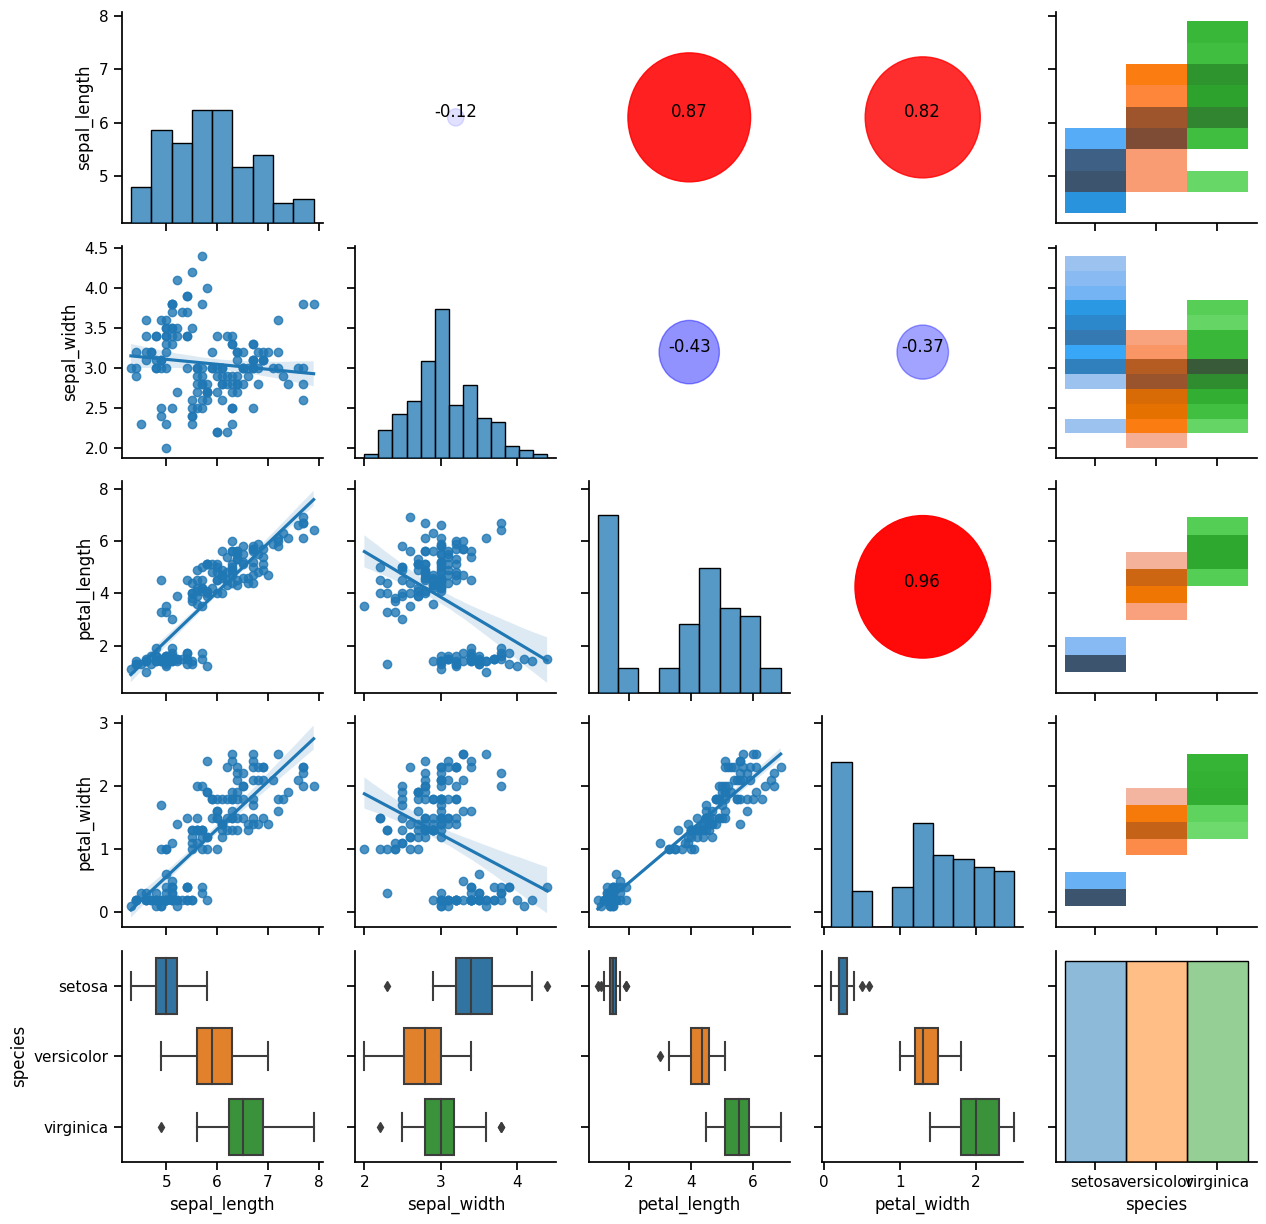

In [10]:
g = sns.PairGrid(iris, vars=iris.columns)
g.map_lower(map_lower)
g.map_diag(map_diag)
g.map_upper(map_upper)
g.map_upper(map_upper, n=1)

In [11]:
import pingouin as pg
import numpy as np

<Axes: >

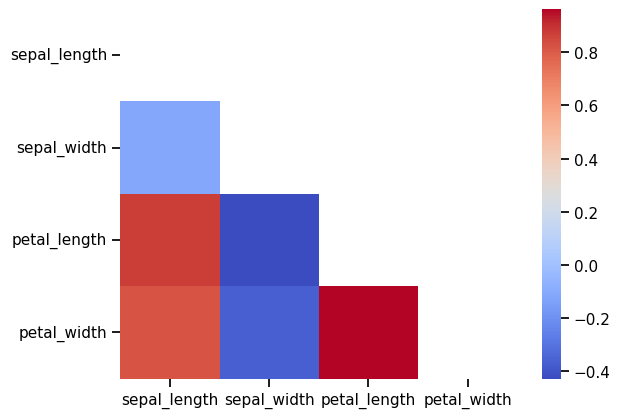

In [16]:
corr_mat = pg.rcorr(iris.select_dtypes('number'), pval_stars={})\
            .applymap(lambda x: np.nan if x in ['-', ''] else x)\
            .astype(float)
sns.heatmap(corr_mat, cmap="coolwarm")

In [19]:
type(sns.color_palette("coolwarm", as_cmap=True))

matplotlib.colors.LinearSegmentedColormap

In [23]:
cmap = matplotlib.colormaps['RdBu']

In [26]:
matplotlib.cm.hot(0)

(0.0416, 0.0, 0.0, 1.0)